<a href="https://colab.research.google.com/github/lightturtle8/LA2/blob/main/%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%992%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

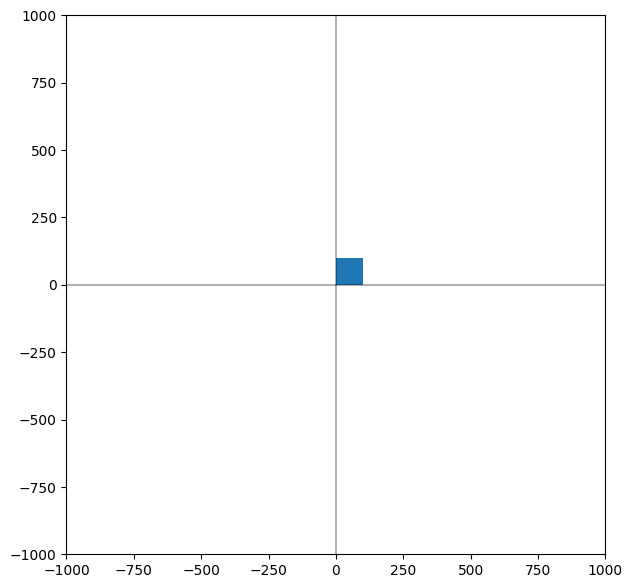

In [86]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


INF = 1000  # 그림판 크기
LEN = 100   # 처음 사각형의 크기

def scale(p, sx, sy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 크기 변환 행렬 생성
  m = np.array([[sx, 0.0, 0.0], [0.0, sy, 0.0], [0.0, 0.0, 1.0]])

  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)

  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q



def draw_axis(ax):
  ax.axhline(0, color='black', alpha=0.3)  # x-axis line
  ax.axvline(0, color='black', alpha=0.3)  # y-axis line
  ax.set_xlim(-INF, INF)
  ax.set_ylim(-INF, INF)
  ax.set_aspect('equal')  # 정사각형 모양으로 backboard 그리기





def draw_rectangle(ax, p1, p2, p3, p4):
  my_polygon = Polygon([p1, p2, p3, p4])
  ax.add_patch(my_polygon)

def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  draw_rectangle(ax, p1, p2, p3, p4)
 
  draw_left_arm(q1, q2, q3, q4)







# 점 p를 x축 방향으로 dx만큼, y축 방향으로 dy만큼 이동시킨 점 q를 구할 것
# q = T(dx, dy) p1
def translate(p, dx, dy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
  #print(q)

  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q


def scale(p, dx, dy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
  #print(q)

  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q



def draw_cockpit(ax, p1, p2, p3, p4):  # 중앙 조종석
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  s = 5
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)
  
  # 3. 회전 변환: R(pi/4)
  q1 = np.rotate(q1, 3.14/4.0)
  q2 = np.rotate(q2, 3.14/4.0)
  q3 = np.rotate(q3, 3.14/4.0)
  q4 = np.rotate(q4, 3.14/4.0)

    # 4. 이동 변환: T(0, -LEN/2)
  q1 = translate(q1, 0, -LEN/2)
  q2 = translate(q2, 0, -LEN/2)
  q3 = translate(q3, 0, -LEN/2)
  q4 = translate(q4, 0, -LEN/2)

  # 3. 회전 변환: R(pi/4)
  theta = np.pi/4.0

  rot_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                         [np.sin(theta), np.cos(theta), 0],
                         [0, 0, 1]])

  q1 = np.dot(rot_matrix, q1)
  q2 = np.dot(rot_matrix, q2)
  q3 = np.dot(rot_matrix, q3)
  q4 = np.dot(rot_matrix, q4)

  
  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)


  # 2. 크기 변환: S(5, 5)
  s = 50
"""
  q1 = np.array(q1)
  q2 = np.array(q2)
  q3 = np.array(q3)
  q4 = np.array(q4)
"""








def draw_left_arm(p1, p2, p3, p4):
    # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  
  # 2. 크기 변환: S(5, 5)
  s = 5

  q1 = np.array(q1)
  q2 = np.array(q2)
  q3 = np.array(q3)
  q4 = np.array(q4)

  q1 = np.scale(q1, s, s)
  q2 = np.scale(q2, s, s)
  q3 = np.scale(q3, s, s)
  q4 = np.scale(q4, s, s)
  
  # 3. 회전 변환: R(pi/4)
  q1 = np.rotate(q1, 3.14/4.0)
  q2 = np.rotate(q2, 3.14/4.0)
  q3 = np.rotate(q3, 3.14/4.0)
  q4 = np.rotate(q4, 3.14/4.0)

  draw_rectangle(ax, q1, q2, q3, q4)

"""
  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)
"""



def draw_left_wing(p1, p2, p3, p4):
    # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  
  # 2. 크기 변환: S(5, 5)
  s = 50

  q1 = np.array(q1)
  q2 = np.array(q2)
  q3 = np.array(q3)
  q4 = np.array(q4)

  q1 = np.scale(q1, s, s)
  q2 = np.scale(q2, s, s)
  q3 = np.scale(q3, s, s)
  q4 = np.scale(q4, s, s)
  
  # 3. 회전 변환: R(pi/4)
  q1 = np.rotate(q1, 3.14/4.0)
  q2 = np.rotate(q2, 3.14/4.0)
  q3 = np.rotate(q3, 3.14/4.0)
  q4 = np.rotate(q4, 3.14/4.0)

  q1 = shear_x(q1, 2)
  q2 = shear_x(q2, 2)
  q3 = shear_x(q3, 2)
  q4 = shear_x(q4, 2)
  
  draw_rectangle(ax, q1, q2, q3, q4)


def draw_right_arm(p1, p2, p3, p4):
    # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  
  # 2. 크기 변환: S(5, 5)
  s = 5

  q1 = np.array(q1)
  q2 = np.array(q2)
  q3 = np.array(q3)
  q4 = np.array(q4)

  q1 = np.scale(q1, s, s)
  q2 = np.scale(q2, s, s)
  q3 = np.scale(q3, s, s)
  q4 = np.scale(q4, s, s)
  
  # 3. 회전 변환: R(pi/4)
  q1 = np.rotate(q1, 3.14/4.0)
  q2 = np.rotate(q2, 3.14/4.0)
  q3 = np.rotate(q3, 3.14/4.0)
  q4 = np.rotate(q4, 3.14/4.0)

  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  draw_rectangle(ax, q1, q2, q3, q4)



def draw_right_wing(p1, p2, p3, p4):
    # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  
  # 2. 크기 변환: S(5, 5)
  s = 50

  q1 = np.array(q1)
  q2 = np.array(q2)
  q3 = np.array(q3)
  q4 = np.array(q4)

  q1 = np.scale(q1, s, s)
  q2 = np.scale(q2, s, s)
  q3 = np.scale(q3, s, s)
  q4 = np.scale(q4, s, s)
  
  # 3. 회전 변환: R(pi/4)
  q1 = np.rotate(q1, 3.14/4.0)
  q2 = np.rotate(q2, 3.14/4.0)
  q3 = np.rotate(q3, 3.14/4.0)
  q4 = np.rotate(q4, 3.14/4.0)

  q1 = shear_x(q1, 2)
  q2 = shear_x(q2, 2)
  q3 = shear_x(q3, 2)
  q4 = shear_x(q4, 2)
  
  draw_rectangle(ax, q1, q2, q3, q4)


def draw_cockpit(ax, p1, p2, p3, p4):  # 중앙 조종석
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  s = 5
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)
  
  # 3. 회전 변환: R(pi/4)
  q1 = np.rotate(q1, 3.14/4.0)
  q2 = np.rotate(q2, 3.14/4.0)
  q3 = np.rotate(q3, 3.14/4.0)
  q4 = np.rotate(q4, 3.14/4.0)

    # 4. 이동 변환: T(0, -LEN/2)
  q1 = translate(q1, 0, -LEN/2)
  q2 = translate(q2, 0, -LEN/2)
  q3 = translate(q3, 0, -LEN/2)
  q4 = translate(q4, 0, -LEN/2)

  # 3. 회전 변환: R(pi/4)
  theta = np.pi/4.0

  rot_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                         [np.sin(theta), np.cos(theta), 0],
                         [0, 0, 1]])

  q1 = np.dot(rot_matrix, q1)
  q2 = np.dot(rot_matrix, q2)
  q3 = np.dot(rot_matrix, q3)
  q4 = np.dot(rot_matrix, q4)

  
  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)


  # 2. 크기 변환: S(5, 5)
  s = 50


def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  # 1. 중앙 조종석 그리기
  draw_rectangle(ax, p1, p2, p3, p4)
  #draw_left_arm(ax, q1, q2, q3, q4)

# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()
